# Lightning Strike Data Analysis

* **Overview**
**This analysis explores lightning strike data from 2016 to 2018, provided by the National Oceanic and Atmospheric Association (NOAA).**
> * In this work, I examined patterns across months, quarters, and years.
The findings are visualized to reveal trends in lightning activity by time and location.

 **Project Objectives**

* **To analyze spatial and temporal patterns of lightning strikes**
   

* **To identify high-risk lightning hotspots and their frequency**
 
* **To assess seasonal and quarterly trends in lightning activity**
   

* **To compare lightning strike activity across multiple years**
  
* **To provide data-driven insights for weather monitoring and disaster mitigation**

## 1. Import important liberaries and load the dataset

- Import relevant libraries and modules

In [1]:
#Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

## **Load the dataset**

In [2]:
# Read in the 2018 data.
df_2018 = pd.read_csv('eda_structuring_with_python_dataset1.csv') 

## 2. Data exploration(understanding the situation, investingating the data and columns)

### **Display the first 5 rows of the data**

In [3]:
# Print the first 5 rows of dataset 1
df_2018.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


> **In geospatial data, especially when using formats like WKT (Well-Known Text) — such as POINT(-75 27) — the coordinate order is:**

>> * longitude first, then latitude

### **Observe the shape**

In [4]:
df_2018.shape

(3401012, 3)

**Observations:**

* The dataset comprises 3401012 rows and 3 columns.
* In 2018, `3401012`  **date_location**  combinations with different s of strikes are included in the dataset. 

* **Data types**

In [9]:
df_2018.dtypes

date                 object
number_of_strikes     int64
center_point_geom    object
dtype: object

> * Tha data type of 

In [4]:
df_2018['date']=pd.to_datetime(df_2018.date)

### **Desctiptive statistics**

In [5]:
df_2018.describe()

,date,number_of_strikes
count,3401012,3.401012e+06
mean,2018-07-13 03:32:02.018504960,1.311403e+01
min,2018-01-01 00:00:00,1.000000e+00
25%,2018-06-04 00:00:00,2.000000e+00
50%,2018-07-18 00:00:00,4.000000e+00
75%,2018-08-24 00:00:00,1.200000e+01
max,2018-12-31 00:00:00,2.211000e+03
std,NaN,3.212099e+01


**Observation**
> * The minimum and maximum dates are  **2018-01-01 00:00:00** and **2018-12-31 00:00:00** respectively.
> * The data contains 2018 lightning strikes 

### **Unique locations**

In [9]:
df_2018.center_point_geom.unique().size

170855

> * **170855** locations are included in the dataset

### **Check for any null values**

In [19]:
#find sum of missed values in each row
df_2018.isna().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

> * There is no missing value in the dataset

### **Missed days**

In [10]:
pd.date_range(start='2018-01-01', end='2018-12-31').size-df_2018.date.unique().size

8

In [9]:
# Create datetime index of every date in 2018
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')

# Determine which values are in `full_date_range` but not in `df['date']`
full_date_range.difference(df_2018['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

* we have no entry on 8 days which are ['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02']
* On these days either there were no strikes or not included in the dataset due to different reasons

### **Exact Duplications**

In [20]:
#find total exact duplicates
df_2018.duplicated().sum()

0

> * There is nupmication in the dataset

### **Exact Entry**
> * An entry to be unique, there should be a single **date - center_point_geom** combination.

In [21]:
# find total duplicates in date - center_point_geom combination
df_2018.duplicated(subset=['date','center_point_geom']).sum()

0

> *  It is shown that there is no duplications in the mentioned columns.

## 3. Adding New Rows
> * The date might be important if different parts are extracted

In [6]:
# Create new  column
df_2018['year'] = df_2018['date'].dt.year
df_2018['month_N'] = df_2018['date'].dt.month
df_2018['month']=df_2018['date'].dt.month_name().str[0:3]
df_2018['month_y'] = df_2018['date'].dt.strftime('%Y-%m')
df_2018['quarter_y'] = df_2018['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df_2018['quarter'] = df_2018['date'].dt.quarter
df_2018['week'] = df_2018.date.dt.isocalendar().week
df_2018['weekday'] = df_2018.date.dt.day_name()

In [7]:
df_2018.head(2)

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday
0,2018-01-03,194,POINT(-75 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday


## 4. Observe the daily distribution through box plot

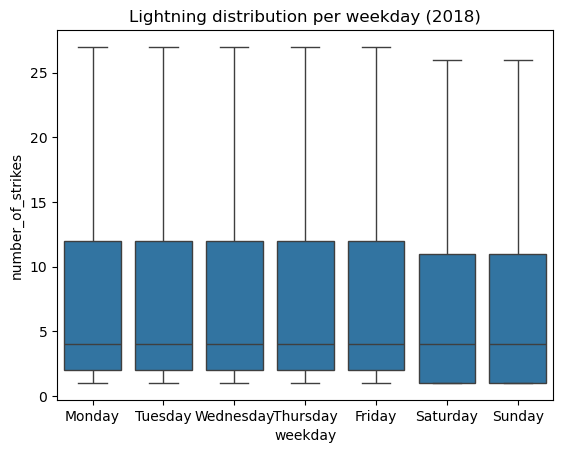

In [9]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df_2018, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

> * Notice that the median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are *both* lower than they are during the rest of the week. In the U.S., Saturday and Sunday are days that many people don't work, so there may be fewer factories operating and fewer cars on the road. This is only speculation, but it's one possible path for further exploration. 

## 5. Analysing Data  and Drawing Insights

### Q1: What Are the Top five Locations for Daily Lightning Strike Peaks?

In [10]:
# Sort by number of strikes in descending order.
top_five_daily_strike_loc=df_2018.sort_values(by='number_of_strikes', ascending=False).set_index('center_point_geom')['number_of_strikes'].head()
top_five_daily_strike_loc

center_point_geom
POINT(-92.5 35.5)    2211
POINT(-96.1 36.1)    2142
POINT(-90.2 36.1)    2061
POINT(-89.9 35.9)    2031
POINT(-96.2 36.1)    1902
Name: number_of_strikes, dtype: int64

>* The five locations with the highest number of lightning strikes recorded on a single day in 2018 are near Arkansas, Oklahoma, Missouri, Tennessee and (Oklahomaslightly west).

>> * All these points are in the southern United States, where lightning activity is common.

### Q2: Which five Locations Experienced Lightning Strikes on the Most Days?


In [11]:
# Identify the locations that appear most in the dataset.
loc_most_strike_days=df_2018.center_point_geom.value_counts().head()
loc_most_strike_days

center_point_geom
POINT(-81.5 22.5)    108
POINT(-84.1 22.4)    108
POINT(-82.5 22.9)    107
POINT(-82.7 22.9)    107
POINT(-82.5 22.8)    106
Name: count, dtype: int64

> * The five locations that recorded lightning activity on the highest number of days throughout the year are located near the Cuba cities Camagüey, Pinar del Río, Santa Clara and Ciego de Ávil., Cuba

>> * These are lightning-prone areas with frequent atmospheric activity during 2018.

### Q3: Which Five Locations Recorded the Highest Total Number of Lightning Strikes?

In [12]:
five_highest_total_strikes_loc=df_2018.groupby('center_point_geom')['number_of_strikes'].sum().sort_values(ascending=False).head()
five_highest_total_strikes_loc

center_point_geom
POINT(-84.2 22.4)    5469
POINT(-82.9 22.9)    4527
POINT(-82.3 22.9)    4506
POINT(-82.4 22.9)    4456
POINT(-84.1 22.5)    4421
Name: number_of_strikes, dtype: int64

> * The top five locations with the greatest cumulative lightning strikes recorded in 2018 are all in Cuba near the city of Pinar del Río and Havana.

### Q4: Which Months Recorded the Highest Total Number of Lightning Strikes?

In [13]:
# let we add season to my dataset
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
df_2018['season']=df_2018.month_N.apply(get_season)

In [14]:
total_monthly_lightening_strike=df_2018.groupby(['month_N','month','season'])['number_of_strikes'].sum().sort_values(ascending=False).reset_index()
total_monthly_lightening_strike

,month_N,month,season,number_of_strikes
0,8,Aug,Summer,15525255
1,7,Jul,Summer,8320400
2,6,Jun,Summer,6445083
3,5,May,Spring,4166726
4,9,Sep,Autumn,3018336
5,2,Feb,Winter,2071315
6,4,Apr,Spring,1524339
7,10,Oct,Autumn,1093962
8,1,Jan,Winter,860045
9,3,Mar,Spring,854168


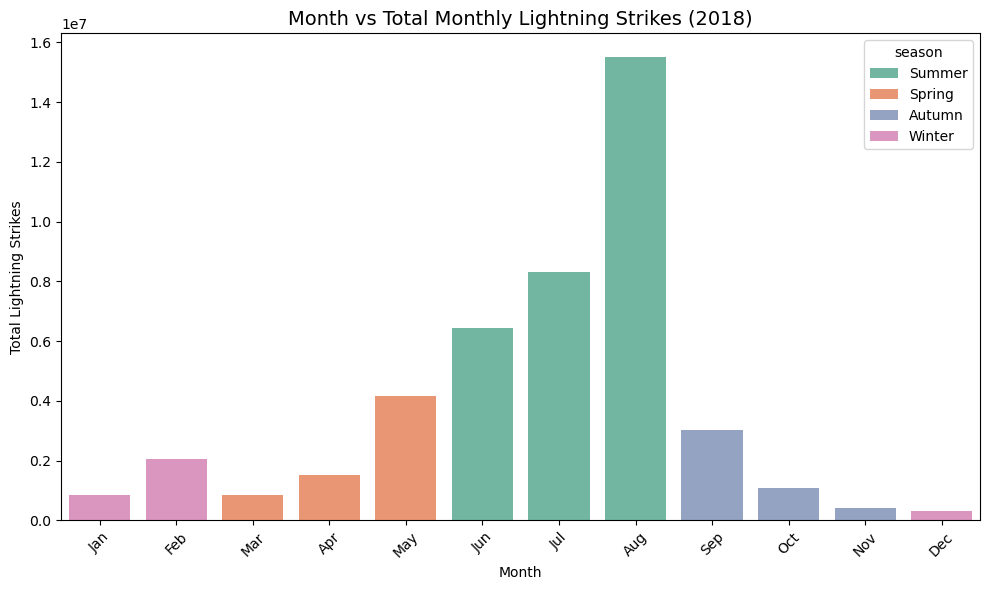

In [15]:
# Sort to get the correct order of months
sorted_df = total_monthly_lightening_strike.sort_values('month_N')
# Extract month order
month_order = sorted_df['month'].tolist()
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_monthly_lightening_strike,
    x='month',
    y='number_of_strikes',
    hue='season',
    dodge=False,
    order=month_order,         # Enforce correct month order
    palette='Set2'
)

# Labels and Title
plt.title('Month vs Total Monthly Lightning Strikes (2018)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Lightning Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>* The highest lightning activity occurred in summer months, especially August and July.
>* From March (Spring) through August (Summer), there is a clear and significant increase in lightning strikes
>* This upward trend reflects the seasonal shift into summer, when atmospheric conditions (like heat and humidity) favor more frequent thunderstorms and lightning events
>* In every season, there is an increasing pattern in lightening strike
>* Winter months show relatively low strike counts.

## 6. Load lightning strikes of 2016–2017 and merge with the 2018 dataset

In [16]:
# Import 2016–2017 data
df_2016_17 = pd.read_csv('eda_manipulate_date_strings_with_python.csv')
df_2016_17.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


* **observe the data types**

In [17]:
df_2016_17.dtypes

date                 object
number_of_strikes     int64
center_point_geom    object
dtype: object

* The data type of date column should be a date not an object, thus let us change it

In [18]:
df_2016_17['date']=pd.to_datetime(df_2016_17['date'])

### Desctiptive statistics

In [79]:
df_2016_17.describe()

,number_of_strikes
count,1.047900e+07
mean,1.157347e+01
std,2.788072e+01
min,1.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,1.000000e+01
max,2.386000e+03


**Observation**
* The minimum and maximum dates are  **2016-01-01 00:00:00** and **2017-12-31 00:00:00** respectively.
* The data contains **2016** and **2017** lightning strikes

### Observe the 2018 and 2016-2017 dataset formats

In [19]:
df_2018.head(2)

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday,season
0,2018-01-03,194,POINT(-75 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
1,2018-01-03,41,POINT(-78.4 29),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter


In [20]:
df_2016_17.head(2)

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)


* The number of columns are not the same so for further analysis we better arrange and have the same number of columns

### Change the 2016_17 dataset to 2018 format 

In [21]:
# Create new  column
df_2016_17['year'] = df_2016_17['date'].dt.year
df_2016_17['month_N'] = df_2016_17['date'].dt.month
df_2016_17['month']=df_2016_17['date'].dt.month_name().str[0:3]
df_2016_17['month_y'] = df_2016_17['date'].dt.strftime('%Y-%m')
df_2016_17['quarter_y'] = df_2016_17['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df_2016_17['quarter'] = df_2016_17['date'].dt.quarter
df_2016_17['week'] = df_2016_17.date.dt.isocalendar().week
df_2016_17['weekday'] = df_2016_17.date.dt.day_name()
df_2016_17['season']=df_2016_17.month_N.apply(get_season)

In [22]:
df_2016_17=df_2016_17[list(df_2018.columns.values)]

In [23]:
df_2018.head(1)

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday,season
0,2018-01-03,194,POINT(-75 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter


In [24]:
df_2016_17.head(1)

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday,season
0,2016-08-05,16,POINT(-101.5 24.7),2016,8,Aug,2016-08,2016-Q3,3,31,Friday,Summer


> * Now we have same number of columns, we can concatenate and have one dataframe for further analysis

## 7. Combining 2016–2017 data with 2018 data.

In [25]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df_2018, df_2016_17], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday,season
0,2018-01-03,194,POINT(-75 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
1,2018-01-03,41,POINT(-78.4 29),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
2,2018-01-03,33,POINT(-73.9 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
3,2018-01-03,38,POINT(-73.8 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
4,2018-01-03,92,POINT(-79 28),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter


In [26]:
union_df.shape

(13880015, 12)

> * The concatenated dataset comprises 13880015 rows and 12 columns.

### **Statistical description**

In [27]:
union_df.describe()

,date,number_of_strikes,year,month_N,quarter,week
count,13880015,1.388002e+07,1.388002e+07,1.388002e+07,1.388002e+07,13880015.0
mean,2017-09-28 14:43:38.412559104,1.195095e+01,2.017220e+03,6.805259e+00,2.611633e+00,27.65466
min,2016-01-01 00:00:00,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.0
25%,2016-10-03 00:00:00,1.000000e+00,2.016000e+03,6.000000e+00,2.000000e+00,22.0
50%,2017-10-22 00:00:00,4.000000e+00,2.017000e+03,7.000000e+00,3.000000e+00,28.0
75%,2018-07-16 00:00:00,1.000000e+01,2.018000e+03,8.000000e+00,3.000000e+00,34.0
max,2018-12-31 00:00:00,2.386000e+03,2.018000e+03,1.200000e+01,4.000000e+00,53.0
std,NaN,2.898473e+01,8.435894e-01,2.160670e+00,7.519577e-01,9.355327


**Observation**
* The minimum and maximum dates are  **2016-01-01 00:00:00** and **2018-12-31 00:00:00** respectively.
* The data contains **2016** and **2018** lightning strikes

### **Check for nulls**

In [28]:
#checke for nulls
union_df.isna().sum()

date                 0
number_of_strikes    0
center_point_geom    0
year                 0
month_N              0
month                0
month_y              0
quarter_y            0
quarter              0
week                 0
weekday              0
season               0
dtype: int64

* The union dataset is null free.

### **Check for duplicates**

In [29]:
union_df.duplicated(subset=['date','center_point_geom']).sum()

3401012

* There are 3401012 duplicates, let's display the first five rows.

In [30]:
union_df[union_df.duplicated(subset=['date','center_point_geom'])].head()

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday,season
3419977,2018-05-27,13,POINT(-81.1 22.8),2018,5,May,2018-05,2018-Q2,2,21,Sunday,Spring
3419978,2018-05-27,13,POINT(-108.6 42.8),2018,5,May,2018-05,2018-Q2,2,21,Sunday,Spring
3419979,2018-05-27,13,POINT(-104.6 41.8),2018,5,May,2018-05,2018-Q2,2,21,Sunday,Spring
3419980,2018-05-27,13,POINT(-81.3 24.8),2018,5,May,2018-05,2018-Q2,2,21,Sunday,Spring
3419981,2018-05-27,13,POINT(-105.3 43.6),2018,5,May,2018-05,2018-Q2,2,21,Sunday,Spring


> * let's observe the first duplicate

In [107]:
union_df[(union_df.date == '2018-05-27') & (union_df.center_point_geom == 'POINT(-81.1 22.8)')]

,date,number_of_strikes,center_point_geom,month,month_N,week,month_y,quarter,year,weekday,quarter_y,season
3030799,2018-05-27,13,POINT(-81.1 22.8),May,5,21,2018-05,2,2018,Sunday,2018-Q2,Spring
3419977,2018-05-27,13,POINT(-81.1 22.8),May,5,21,2018-05,2,2018,Sunday,2018-Q2,Spring


> * The duplication is exact so we can drop them by the following code

In [113]:
#drop duplicates
union_df.drop_duplicates(subset=['date','center_point_geom'],inplace =True)

In [114]:
# verify the duplication removal
union_df.duplicated(subset=['date','center_point_geom']).sum()

0

* An entry to be unique, there should be a single `**date - center_point_geom**` combination. This is shown by the above result that the current dataset has no duplicates

### Q1: Which Locations Experienced Consistently High Lightning Activity Across Multiple Years?(consider only 10 highest strike locations each year)

In [31]:
# 2016 10 most lightning strike locations
df_16=df_2016_17[df_2016_17['year']==2016].groupby('center_point_geom')[['number_of_strikes']].sum().sort_values(by=['number_of_strikes'],ascending=False).reset_index().head(10)
df_16.rename(columns={'center_point_geom':'center_point_geom_16'},inplace=True)

# 2017 10 most lightning strike locations
df_17=df_2016_17[df_2016_17['year']==2017].groupby('center_point_geom')[['number_of_strikes']].sum().sort_values(by=['number_of_strikes'],ascending=False).reset_index().head(10)
df_17.rename(columns={'center_point_geom':'center_point_geom_17'},inplace=True)

# 2018 10 most lightning strike locations
df_18=df_2016_17[df_2016_17['year']==2018].groupby('center_point_geom')[['number_of_strikes']].sum().sort_values(by=['number_of_strikes'],ascending=False).reset_index().head(10)
df_18.rename(columns={'center_point_geom':'center_point_geom_18'},inplace=True)

#Extract the locations and store them as sets
s16=set(df_16.center_point_geom_16.values)
s17=set(df_17.center_point_geom_17.values)
s18=set(df_18.center_point_geom_18.values)

#find and display common locations through intersectio
print('Common location of 2016 and 17= ',s16.intersection(s17))
print('\nCommon location of 2017 and 18= ',s17.intersection(s18))
print('\nCommon location of 2016 and 18= ',s16.intersection(s18))

Common location of 2016 and 17=  {'POINT(-84.2 22.3)'}

Common location of 2017 and 18=  {'POINT(-84.2 22.4)'}

Common location of 2016 and 18=  {'POINT(-82.3 22.9)'}


> * POINT(-84.2, 22.4) → Near Pinar del Río, Cuba: This spot was among the highest strike zones in both 2017 and 2018.

> * POINT(-82.3, 22.9) → Near Havana, Cuba: This location was a lightning hotspot in both 2016 and 2018.

> * POINT(-84.2, 22.3) :  Also near Pinar del Río, Cuba: This location consistently appeared in the top 10 in both 2016 and 2017.
>> * These repeated appearances across different years highlight persistent lightning activity in these regions which is a potential indicator of stable meteorological patterns or geographical features favorable to thunderstorms.

### Q2: Is There Seasonal Consistency in Lightning Activity Across 2016, 2017, and 2018?

In [32]:
total_monthly_lightening_strike=union_df.groupby(['year','month_N','month','season'])['number_of_strikes'].sum().sort_values(ascending=False).reset_index()
total_monthly_lightening_strike['year']=total_monthly_lightening_strike['year'].astype(str)
total_monthly_lightening_strike.head()

,year,month_N,month,season,number_of_strikes
0,2018,8,Aug,Summer,31050510
1,2018,7,Jul,Summer,16640800
2,2018,6,Jun,Summer,12890166
3,2016,7,Jul,Summer,10661475
4,2017,7,Jul,Summer,8674181


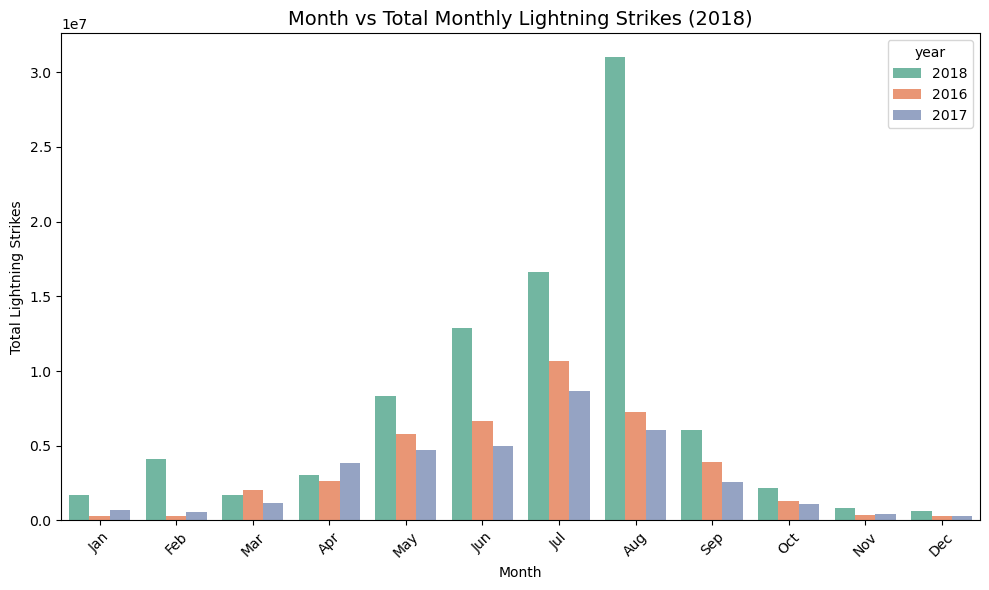

In [33]:
# Sort to get the correct order of months
sorted_df = total_monthly_lightening_strike.sort_values('month_N')
# Extract month order
month_order = sorted_df['month'].tolist()

total_monthly_lightening_strike['hue_combo'] = total_monthly_lightening_strike['season'] + " | " + total_monthly_lightening_strike['year']
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_monthly_lightening_strike,
    x='month',
    y='number_of_strikes',
    hue='year',
    
    dodge=True,
    order=month_order,         # Enforce correct month order
    palette='Set2'
)

# Labels and Title
plt.title('Month vs Total Monthly Lightning Strikes (2018)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Lightning Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* **In all the three years:**
> * The highest lightning activity occurred in summer months: June, August and July.
> * From March (Spring) through August (Summer), there is a clear and significant increase in lightning strikes
> * This upward trend reflects the seasonal shift into summer, when atmospheric conditions (like heat and humidity) favor more frequent thunderstorms and lightning events
> * In every season, there is an increasing pattern in lightening strike
> * Winter months show relatively low strike counts.

### Q3: Is There Quarterly Consistency in Lightning Activity Across 2016, 2017, and 2018?

In [34]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = union_df.groupby(['quarter_y']).sum(numeric_only=True).reset_index()[['quarter_y','number_of_strikes']]

# # Format as text, in millions.
# df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter_y,number_of_strikes
0,2016-Q1,2683798
1,2016-Q2,15084857
2,2016-Q3,21843820
3,2016-Q4,1969754
4,2017-Q1,2444279


* Format  `number_of_strikesas` to text, in millions(M) / thoausand(K)

In [35]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

In [36]:
# Use the readable_numbers() function to create a new column 
df_by_quarter['number_of_strikes_formatted']=df_by_quarter['number_of_strikes'].apply(readable_numbers)
df_by_quarter.head(2)

,quarter_y,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M


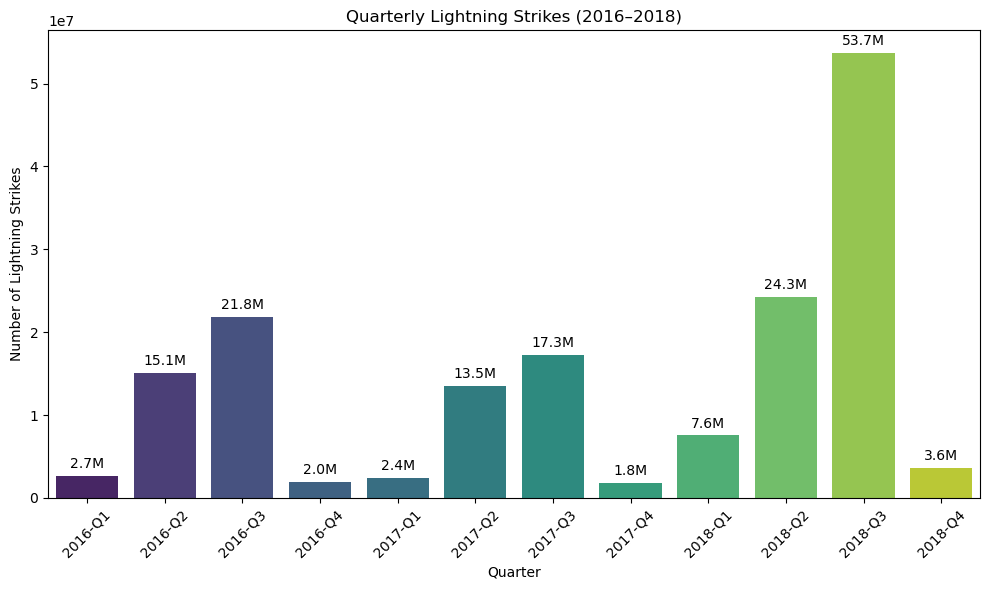

In [37]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_by_quarter,
    x='quarter_y',
    y='number_of_strikes',
    hue='quarter_y',
    palette='viridis'
)

# Add custom labels on top of bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    label = df_by_quarter['number_of_strikes_formatted'].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height + 0.01 * max(df_by_quarter['number_of_strikes']),  # Y position
        label,
        ha='center', va='bottom', fontsize=10
    )

# Labeling the axes
ax.set_xlabel("Quarter")
ax.set_ylabel("Number of Lightning Strikes")
ax.set_title("Quarterly Lightning Strikes (2016–2018)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> **Looking at thjie above quarterly gragh, the poiints to be drawn are the same with the above one**

In [64]:
union_df.head()

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday,season
0,2018-01-03,194,POINT(-75 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
1,2018-01-03,41,POINT(-78.4 29),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
2,2018-01-03,33,POINT(-73.9 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
3,2018-01-03,38,POINT(-73.8 27),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter
4,2018-01-03,92,POINT(-79 28),2018,1,Jan,2018-01,2018-Q1,1,1,Wednesday,Winter


### Q4: Show clearly the Quarterly pattern

In [39]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter_y'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter_y'].str[:4]
df_by_quarter.head()

,quarter_y,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


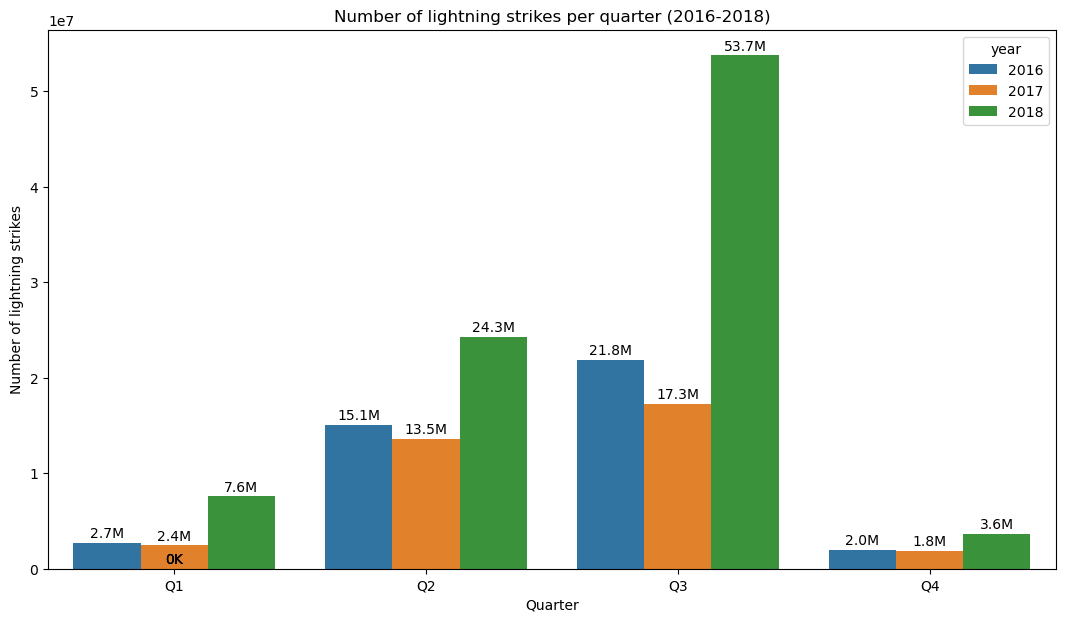

In [42]:
#number_of_strikes_formatted

plt.figure(figsize = (13, 7))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(readable_numbers(b.get_height()), 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 20e5), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

* **observations**
> * Across each of the three years—2016, 2017, and 2018—Q3 (July–September) consistently recorded the highest number of lightning strikes, followed by Q2, Q1, and Q4. This repeated pattern reflects strong quarterly consistency in lightning activity.
> * Q3 aligns with the summer months, which typically bring the most intense atmospheric conditions, such as high heat and humidity that favor thunderstorm formation. This helps explain why Q3 repeatedly leads in strike counts across all years.
> * Q4, covering the cooler, drier months (October–December), had the lowest lightning activity in every year, supporting the idea that seasonal weather patterns are a dominant factor influencing strike frequency.

### Q5: Show Yearly pattern

In [67]:
yearly_strike=union_df.groupby('year')['number_of_strikes'].sum()
yearly_strike

year
2016    41582229
2017    35095195
2018    89201978
Name: number_of_strikes, dtype: int64

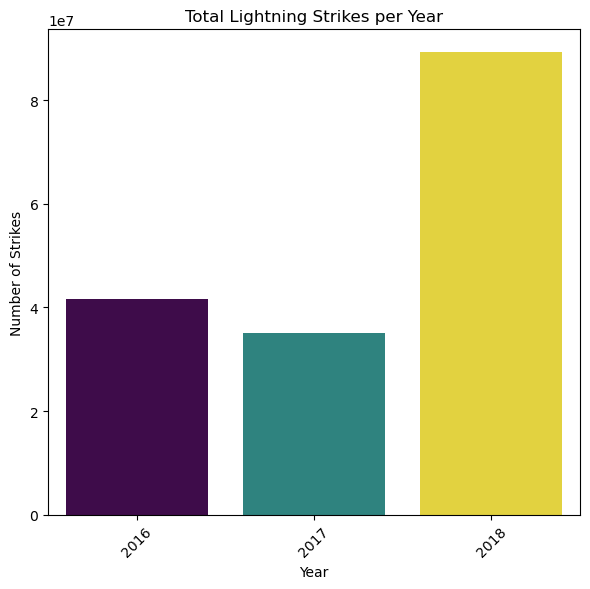

In [74]:
# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=yearly_strike.index, y=yearly_strike, palette='viridis',hue=yearly_strike.index,legend=False)

# Add labels and title
plt.title('Total Lightning Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* 2018 had a dramatic increase in lightning strikes, nearly 2.5× more than 2017 and more than double 2016’s total.
> * Suggests either an extreme weather event year, improved detection technology, or expanded monitoring regions.
* Overall upward trend from 2016 to 2018 despite the dip in 2017.
> * Indicates growing lightning activity, improved monitoring systems, or climate-related changes.

## **Show the geographic distribution on world map**

### Extracting Longitude and latitude from center_point_geom
>* As the dataset is large let's take 100000 samples

In [43]:
df_sample=union_df.sample(n=1000000, random_state=42)

In [44]:
df_sample['location']=df_sample['center_point_geom'].str.replace("POINT(", "").str.replace(")", "").str.split()

In [45]:
def long(m):
    return m[0]
def lat(m):
    return m[1]

df_sample['longitude']=df_sample['location'].apply(long)
df_sample['latitude']=df_sample['location'].apply(lat)

In [47]:
df_sample['longitude']=df_sample['location'].apply(long)
df_sample['latitude']=df_sample['location'].apply(lat)

df_sample.head()

,date,number_of_strikes,center_point_geom,year,month_N,month,month_y,quarter_y,quarter,week,weekday,season,location,longitude,latitude
9206881,2016-08-05,2,POINT(-77.2 21.1),2016,8,Aug,2016-08,2016-Q3,3,31,Friday,Summer,"[-77.2, 21.1]",-77.2,21.1
4241329,2017-05-23,7,POINT(-80.5 31.7),2017,5,May,2017-05,2017-Q2,2,21,Tuesday,Spring,"[-80.5, 31.7]",-80.5,31.7
2273640,2018-05-26,5,POINT(-86.3 45.1),2018,5,May,2018-05,2018-Q2,2,21,Saturday,Spring,"[-86.3, 45.1]",-86.3,45.1
11501850,2017-06-01,5,POINT(-113.6 45.4),2017,6,Jun,2017-06,2017-Q2,2,22,Thursday,Summer,"[-113.6, 45.4]",-113.6,45.4
399501,2018-10-25,46,POINT(-92.9 25.1),2018,10,Oct,2018-10,2018-Q4,4,43,Thursday,Autumn,"[-92.9, 25.1]",-92.9,25.1


In [51]:
# Create new df of just latitude, longitude, and number of strikes and group by latitude and longitude
top_lightning_strikes = df_sample[['latitude','longitude','number_of_strikes']
            ].groupby(['latitude','longitude']
                      ).sum().sort_values('number_of_strikes',ascending=False).reset_index()
top_lightning_strikes.head()

,latitude,longitude,number_of_strikes
0,29.1,-88,2463
1,31.2,-97.5,2183
2,36.1,-90.1,2151
3,36.1,-96.2,2019
4,23,-81.9,2018


* Data could be better understood by plotting the longitude and latitude of locations where lightnibg strike occurs.

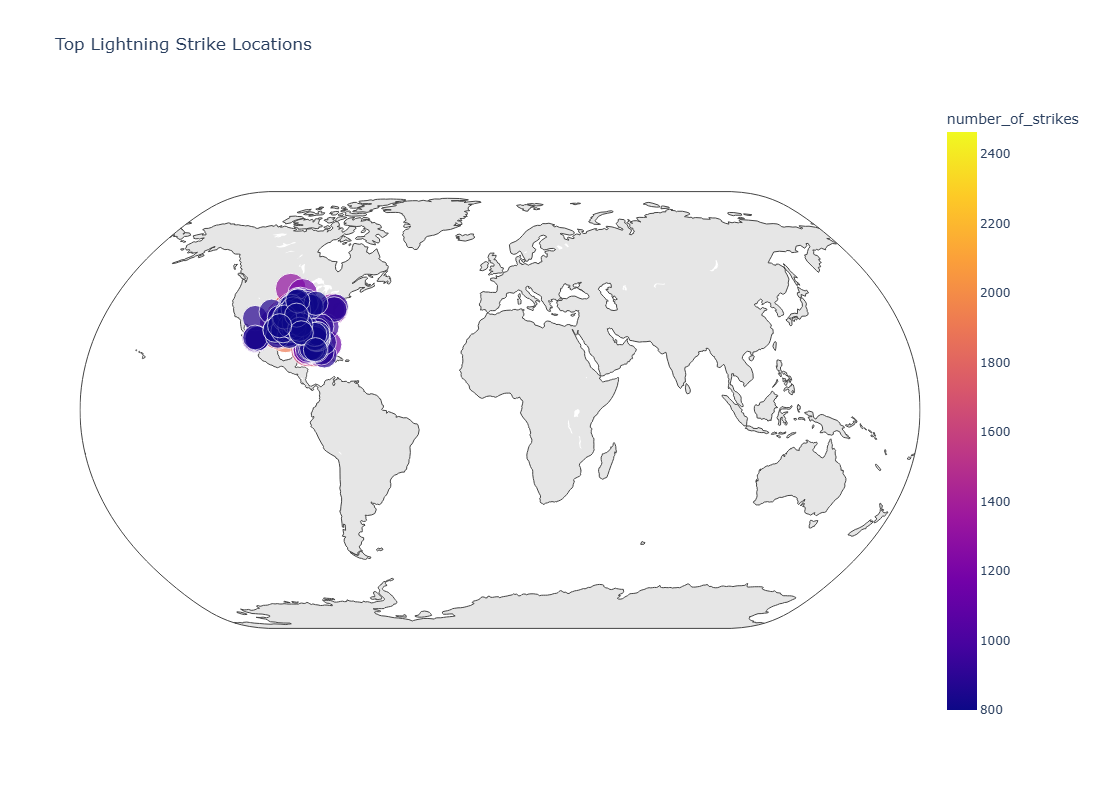

In [75]:
import plotly.express as px

filtered_df = top_lightning_strikes[top_lightning_strikes.number_of_strikes >= 800]

fig = px.scatter_geo(filtered_df,
                     lat="latitude",
                     lon="longitude",
                     size="number_of_strikes",
                     color="number_of_strikes",
                     size_max=30,
                     projection="natural earth",
                     title="Top Lightning Strike Locations")

fig.update_layout(
    width=1200,
    height=800,
    geo=dict(
        showland=True,
        landcolor="rgb(230, 230, 230)"
    )
)

fig.show()


* It’s a nice geographic visualization, but we really don’t need the global scale. Let’s scale it down to only the geographic area we are interested in - the United States.

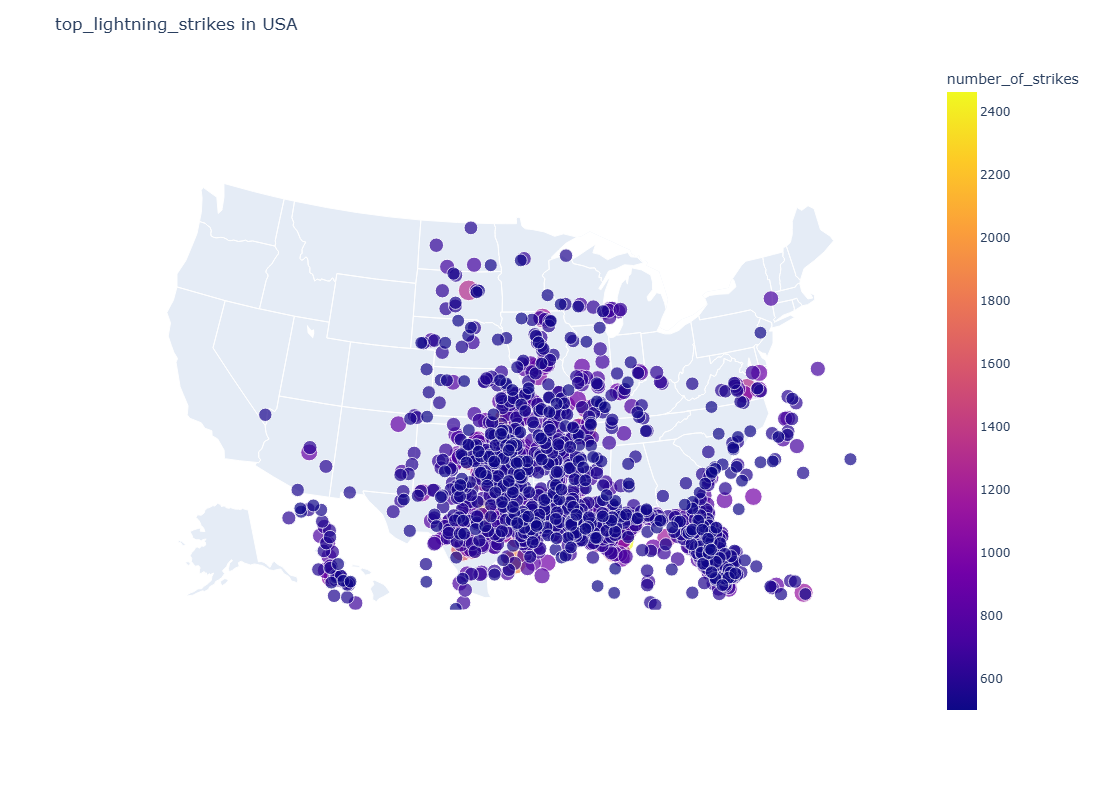

In [76]:
import plotly.express as px  # Be sure to import express
fig = px.scatter_geo(top_lightning_strikes[top_lightning_strikes.number_of_strikes>=500],  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                     color="number_of_strikes",
                    size="number_of_strikes") # Set to plot size as number of strikes
fig.update_layout(
     width=1200,
    height=800,
    title_text = 'top_lightning_strikes in USA', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.show()

## **Insights**

* **Dataset Overview**

  > * The 2018 dataset contains **3.4 million** records across **170,855 unique locations**, capturing daily lightning strike counts.
  > * When combined with 2016 and 2017 data, the **union dataset totals 13.88 million records** and 12 columns.

* **Top Lightning Activity Locations (2018)**

  > * The **highest single-day strike counts** occurred in the southern U.S., particularly near **Arkansas, Oklahoma, and Missouri**.
  > * **Cuba** emerged as the most consistently active lightning zone overall, especially areas near **Pinar del Río and Havana**, which appeared across all top location analyses:

    >> * Highest daily strikes
    >> * Most strike days
    >> * Highest total strikes

* **Seasonal Patterns**

   * Across all three years, **lightning activity peaked in summer months**—particularly **July, August, and June**.
   * There’s a **clear seasonal trend**:

   >  * **Q3 (July–September)** had the **highest activity**
    > * Followed by **Q2**, **Q1**, and **Q4** (lowest activity)
  > * Winter months (Q4) showed minimal lightning activity, confirming the influence of heat and humidity on thunderstorm frequency.

* **Consistent Hotspots Across Years**

   > * Locations in **Cuba**—especially around **POINT(-84.2 22.4)** and **POINT(-82.3 22.9)**—consistently ranked among the top 10 for lightning strikes each year.
   > * This consistency suggests **stable meteorological patterns or geographic features** favorable to lightning formation in those areas.

* **Annual Trends**

   > * A striking spike in 2018: **89.2 million strikes**, compared to **35.1 million in 2017** and **41.6 million in 2016**.
   > * This could indicate:

    >>  * A major **weather anomaly in 2018**
    >>  * **Improved data collection or detection**
     >> * **Expansion of monitored areas**

---

## **Recommendations**

* **Further Investigate Cuba’s Lightning Activity**

   > * Conduct **meteorological or atmospheric studies** to understand why certain Cuban regions show consistently high lightning counts.
   > * Consider infrastructure protection and early warning systems in these high-risk areas.

* **Monitor and Validate the 2018 Spike**

  >  * Assess whether the 2018 increase is due to **natural causes**, **expanded detection networks**, or **changes in data collection methods**.

* **Leverage Seasonal Patterns for Preparedness**

  >  * Utilize the **Q2–Q3 peak activity trend** to develop seasonal **alert systems and public safety protocols**, especially in tropical and subtropical regions.

* **Visualize Hotspots with Geographic Context**

   > * Create **heatmaps or interactive maps** showing persistent hotspots across years to support urban planning, disaster preparedness, and risk mitigation.

* **Integrate with Climate Data**

  >  * Correlate lightning strike trends with climate indicators like **temperature, humidity, El Niño patterns, and precipitation** for deeper insights.

* **Consider Expanding Data Scope**

  >  * Include more metadata such as **storm severity, time of day, or satellite identifiers** to enhance future predictive modeling.

